<a href="https://colab.research.google.com/github/Tiagoeem/visao_2022_batalha_das_redes/blob/main/batalha_das_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração



In [ ]:
# Grupos
grupos = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']
seu_grupo = 'Gx' # substitua o x pelo número do seu grupo

In [ ]:
from pathlib import Path

url = 'https://drive.google.com/drive/folders/19kpxBcOq8t0b19q0xUkCMPeplk0Kjlpo?usp=sharing'

import gdown
gdown.download_folder(url, quiet=True)

['/content/Desafios/criado_por_G3/1.png',
 '/content/Desafios/criado_por_G3/2.png',
 '/content/Desafios/criado_por_G3/3.png',
 '/content/Desafios/criado_por_G3/4.png',
 '/content/Desafios/criado_por_G3/5.png',
 '/content/Desafios/criado_por_G3/6.png',
 '/content/Desafios/criado_por_G4/teste3.png',
 '/content/Desafios/criado_por_G4/teste7.png',
 '/content/Desafios/criado_por_Tiago/des_Tiago_1.bmp',
 '/content/Desafios/criado_por_Tiago/des_Tiago_2.bmp',
 '/content/Desafios/criado_por_Tiago/des_Tiago_5.bmp']

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

raiz_desafio = Path('/content/Desafios/')
dict_desafios = {}
for dir in raiz_desafio.iterdir():
    nome_grupo = str(dir).split('_')[2]
    dict_desafios[nome_grupo] = {}
    for arq in dir.iterdir():
        digito = str(arq).split('.')[0][-1]
        dict_desafios[nome_grupo][digito] = {}
        dict_desafios[nome_grupo][digito]['true'] = int(digito)
        dict_desafios[nome_grupo][digito]['file'] = arq
        im = cv.imread(str(arq.resolve()))
        b,g,r = cv.split(im)
        p = np.array(b).astype('float32')
        dict_desafios[nome_grupo][digito]['imagem'] = p / 255
        dict_desafios[nome_grupo][digito]['predito'] = 0

## Exemplo de uso

In [ ]:
dict_desafios['G3']['3']['imagem']

array([[0.00392157, 0.        , 0.00392157, 0.00392157, 0.        ,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.        , 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157],
       [0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.        , 0.0039

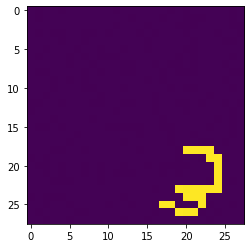

In [ ]:
plt.imshow(dict_desafios['G3']['3']['imagem'])
plt.show()

In [ ]:
# predicao = model.predict( np.array([ dict_desafios['G3']['3']['imagem'] ]) )
predicao = 3 # -> apenas um exemplo
predicao

3

In [ ]:
# armazenar predição
dict_desafios['G3']['3']['predito'] = predicao

# Desempenho

Utilize a função verificacao_desempenho

In [ ]:
def verificacao_desempenho(dict_desafio):
    pontuacoes = {} 
    pontuacoes['acertos_totais'] = 0
    pontuacoes['total'] = 0
    pontuacoes['%'] = 0
    for grupo in dict_desafio:
        pontuacoes['total'] += 1

        pontuacoes[grupo] = {}
        pontuacoes[grupo]['acertos'] = 0
        pontuacoes[grupo]['total'] = 0
        pontuacoes[grupo]['%'] = 0
        for digito in dict_desafio[grupo]:
            pontuacoes[grupo]['total'] += 1

            if dict_desafio[grupo][digito]['predito'] == dict_desafio[grupo][digito]['true']:
                pontuacoes[grupo]['acertos'] += 1

            pontuacoes[grupo]['%'] = pontuacoes[grupo]['acertos'] / pontuacoes[grupo]['total']

        pontuacoes['%'] = pontuacoes['acertos_totais'] / pontuacoes['total']

    return pontuacoes
                

In [ ]:
verificacao_desempenho( dict_desafios )

{'acertos_totais': 0,
 'total': 7,
 '%': 0.0,
 'G2': {'acertos': 0, 'total': 0, '%': 0},
 'Tiago': {'acertos': 0, 'total': 3, '%': 0.0},
 'G3': {'acertos': 1, 'total': 6, '%': 0.16666666666666666},
 'G1': {'acertos': 0, 'total': 0, '%': 0},
 'G4': {'acertos': 0, 'total': 2, '%': 0.0},
 'G5': {'acertos': 0, 'total': 0, '%': 0},
 'G6': {'acertos': 0, 'total': 0, '%': 0}}